Adopted Operating Budget Analysis

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

file_path = 'data/fy24-adopted-operating-budget.csv'
df = pd.read_csv(file_path)


unique_departments = df['Dept'].unique()
num_departments = len(unique_departments)

unique_programs = df['Program'].unique()
num_programs = len(unique_programs)

expense_category = df['Expense Category'].unique()
num_expense_category = len(expense_category)

print("Number of departments:", num_departments)
print("Number of programs:", num_programs)
print("Number of expense category:", num_expense_category)


Number of departments: 82
Number of programs: 220
Number of expense category: 7


In [3]:
df['FY21 Actual Expense'] = pd.to_numeric(df['FY21 Actual Expense'], errors='coerce')
df['FY22 Actual Expense'] = pd.to_numeric(df['FY22 Actual Expense'], errors='coerce')
df['FY23 Appropriation'] = pd.to_numeric(df['FY23 Appropriation'], errors='coerce')
df['FY24 Adopted'] = pd.to_numeric(df['FY24 Adopted'], errors='coerce')

# FY21 Actual Expenses in Total
fy21_expenses = df.groupby('Dept').agg({
    'FY21 Actual Expense': 'sum',
})
fy21_expenses['Total Expenses'] = fy21_expenses.sum(axis=1)

# FY22 Actual Expenses in Total
fy22_expenses = df.groupby('Dept').agg({
    'FY22 Actual Expense': 'sum',
})
fy22_expenses['Total Expenses'] = fy22_expenses.sum(axis=1)

# FY23 Appropriation
fy23_expenses = df.groupby('Dept').agg({
    'FY23 Appropriation': 'sum',
})
fy23_expenses['Total Expenses'] = fy23_expenses.sum(axis=1)

# FY23 Adopted
fy24_expenses = df.groupby('Dept').agg({
    'FY24 Adopted': 'sum',
})
fy24_expenses['Total Expenses'] = fy24_expenses.sum(axis=1)


In [4]:
# Find the department with the highest total expenses in 2021
fy21_department_with_highest_expenses = fy21_expenses['Total Expenses'].idxmax()
fy21_highest_expenses = fy21_expenses['Total Expenses'].max()

print("Department with the highest total expenses in 2021:", fy21_department_with_highest_expenses)
print("Total expenses for the department:", fy21_highest_expenses)


Department with the highest total expenses in 2021: Boston Public Schools
Total expenses for the department: 1260465246.41


In [5]:
# Find the department with the highest total expenses in 2022
fy22_department_with_highest_expenses = fy22_expenses['Total Expenses'].idxmax()
fy22_highest_expenses = fy22_expenses['Total Expenses'].max()

print("Department with the highest total expenses in 2022:", fy22_department_with_highest_expenses)
print("Total expenses for the department:", fy22_highest_expenses)

Department with the highest total expenses in 2022: Boston Public Schools
Total expenses for the department: 1294706181.3700001


In [6]:
# Find the department with the highest total expenses in 2023
fy23_department_with_highest_expenses = fy23_expenses['Total Expenses'].idxmax()
fy23_highest_expenses = fy23_expenses['Total Expenses'].max()

print("Department with the highest appropriation in 2023:", fy23_department_with_highest_expenses)
print("Total expenses for the department:", fy23_highest_expenses)

Department with the highest appropriation in 2023: Boston Public Schools
Total expenses for the department: 1377262308.0


In [7]:
# Find the department with the highest total expenses in 2024
fy24_department_with_highest_expenses = fy24_expenses['Total Expenses'].idxmax()
fy24_highest_expenses = fy24_expenses['Total Expenses'].max()

print("Department with the highest adopted expense in 2024:", fy24_department_with_highest_expenses)
print("Total expenses for the department:", fy24_highest_expenses)

Department with the highest adopted expense in 2024: Boston Public Schools
Total expenses for the department: 1445729446.0


Top 10 programs with the highest expenses in FY21:
                                         FY21 Actual Expense  Total Expenses  \
Dept                                                                           
Boston Public Schools                           1.260465e+09    1.260465e+09   
Police Department                               4.229175e+08    4.229175e+08   
Fire Department                                 2.689599e+08    2.689599e+08   
Health Insurance                                2.109008e+08    2.109008e+08   
Public Health Commission                        1.064735e+08    1.064735e+08   
Public Works Department                         9.415263e+07    9.415263e+07   
MBTA                                            9.334511e+07    9.334511e+07   
Department of Innovation and Technology         4.122373e+07    4.122373e+07   
OPEB                                            4.000000e+07    4.000000e+07   
Library Department                              3.984132e+07    3.984

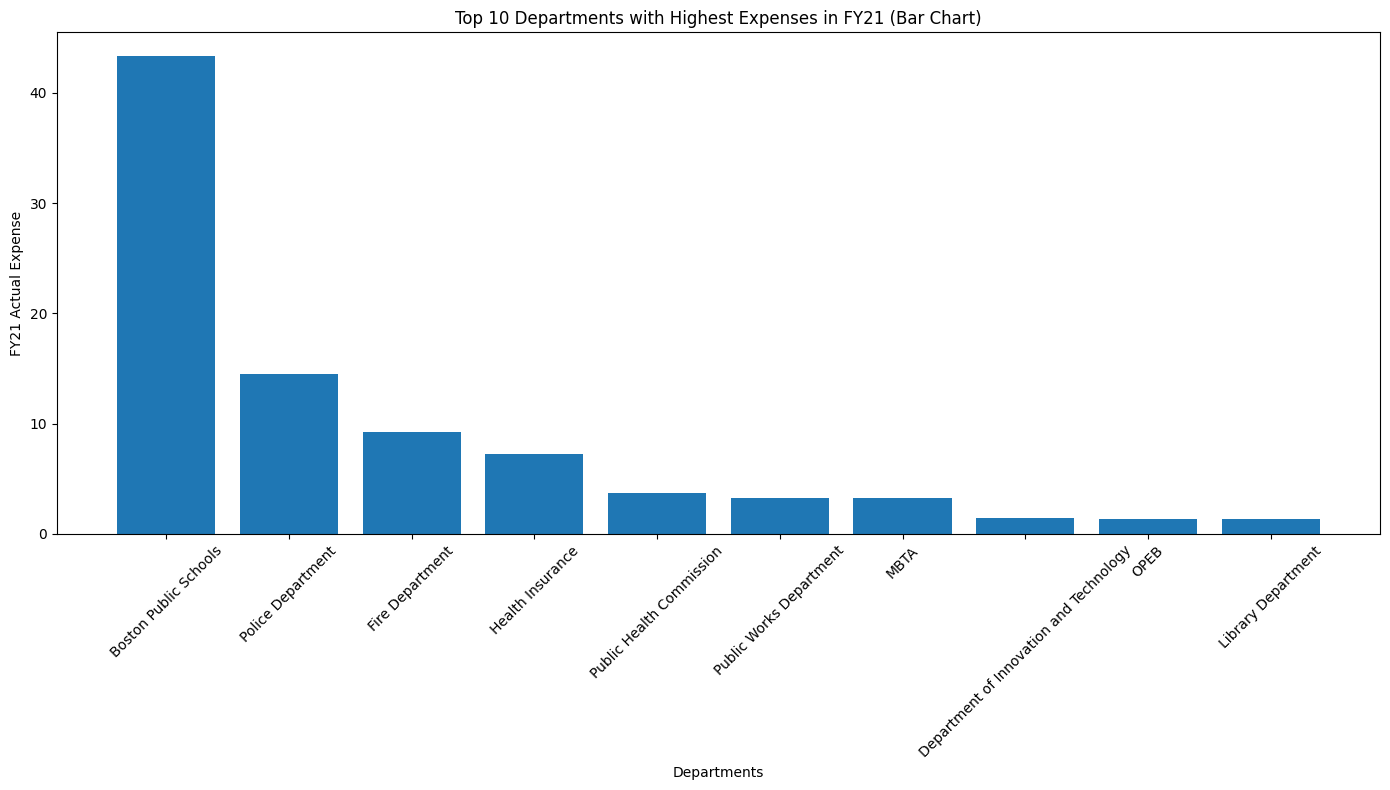

In [8]:
total_expenses_fy21 = fy21_expenses['FY21 Actual Expense'].sum()
fy21_expenses['FY21 Percentage'] = (fy21_expenses['FY21 Actual Expense'] / total_expenses_fy21) * 100

# Sort the programs by FY21 Actual Expense in descending order
sorted_programs = fy21_expenses.sort_values(by='FY21 Actual Expense', ascending=False)

# Select the top 10 programs with the highest expenses in FY21
top_10_programs = sorted_programs.head(10)

print("Top 10 programs with the highest expenses in FY21:")
print(top_10_programs)

# Create the bar chart for FY21
plt.figure(figsize=(14, 8))
plt.bar(top_10_programs.index, top_10_programs['FY21 Percentage'])
plt.title('Top 10 Departments with Highest Expenses in FY21 (Bar Chart)')
plt.xlabel('Departments')
plt.ylabel('FY21 Actual Expense')
plt.xticks(rotation=45)
plt.tight_layout()


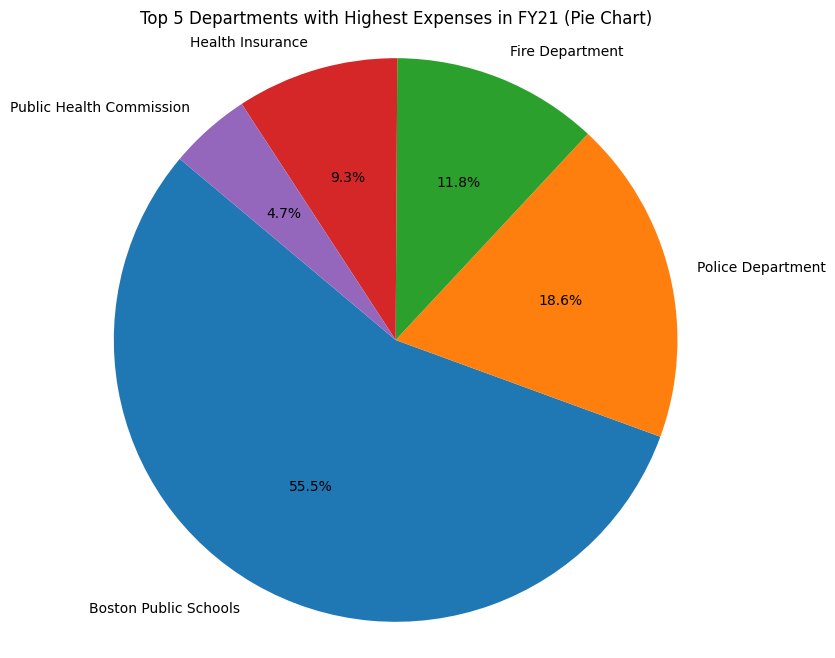

<Figure size 640x480 with 0 Axes>

In [9]:
top_5_programs = sorted_programs.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_programs['FY21 Percentage'], labels=top_5_programs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Departments with Highest Expenses in FY21 (Pie Chart)')
plt.axis('equal')

plt.show()
plt.savefig("i1.png")

Top 10 programs with the highest expenses in FY22:
                                         FY22 Actual Expense  Total Expenses  \
Dept                                                                           
Boston Public Schools                           1.294706e+09    1.294706e+09   
Police Department                               4.204116e+08    4.204116e+08   
Fire Department                                 2.895138e+08    2.895138e+08   
Health Insurance                                2.052066e+08    2.052066e+08   
Public Health Commission                        1.148021e+08    1.148021e+08   
Public Works Department                         9.899347e+07    9.899347e+07   
MBTA                                            9.411701e+07    9.411701e+07   
Reserve for Collective Bargaining City          5.200000e+07    5.200000e+07   
Department of Innovation and Technology         4.659973e+07    4.659973e+07   
Library Department                              4.092425e+07    4.092

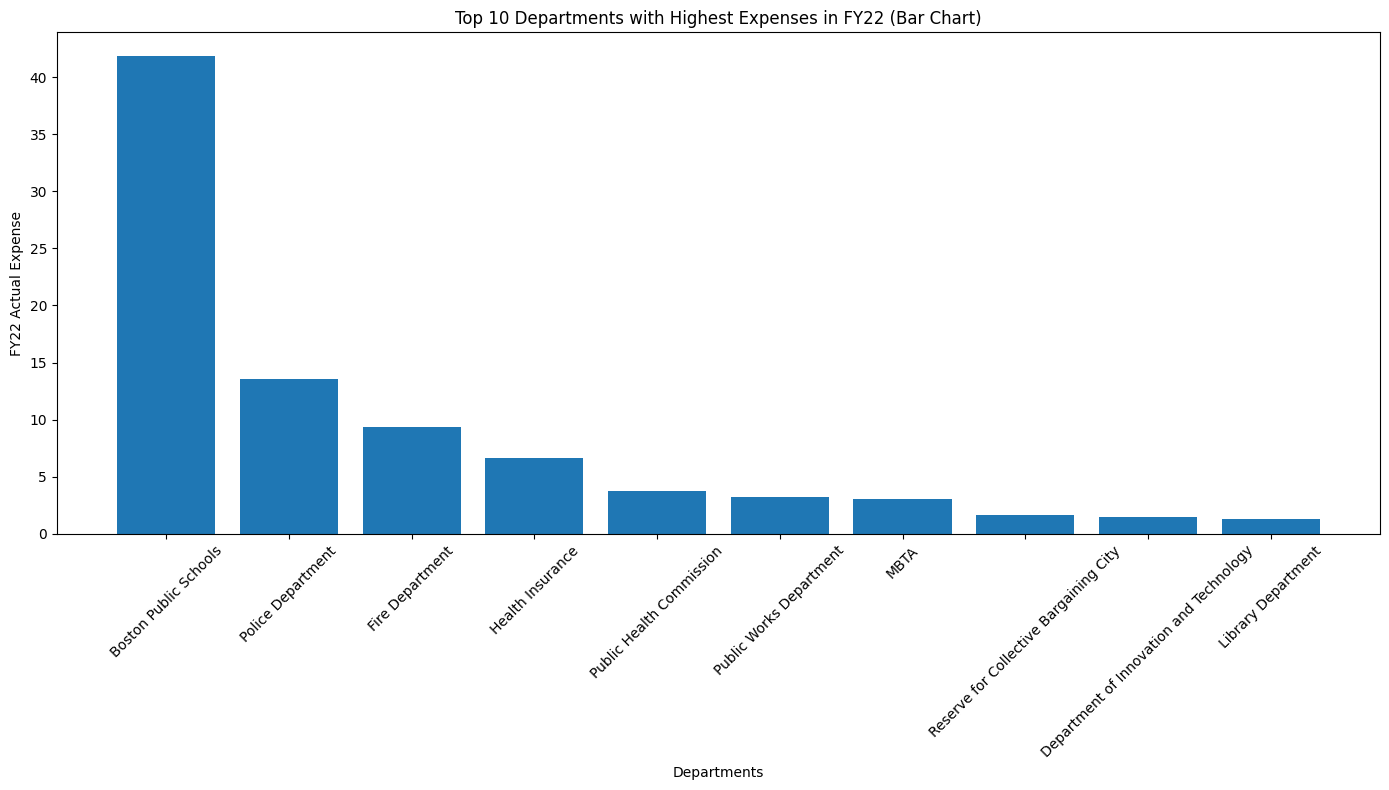

In [10]:
total_expenses_fy22 = fy22_expenses['FY22 Actual Expense'].sum()
fy22_expenses['FY22 Percentage'] = (fy22_expenses['FY22 Actual Expense'] / total_expenses_fy22) * 100

# Sort the programs by FY22 Actual Expense in descending order
sorted_programs = fy22_expenses.sort_values(by='FY22 Actual Expense', ascending=False)

# Select the top 10 programs with the highest expenses in FY21
top_10_programs = sorted_programs.head(10)

print("Top 10 programs with the highest expenses in FY22:")
print(top_10_programs)

# Create the bar chart for FY21
plt.figure(figsize=(14, 8))
plt.bar(top_10_programs.index, top_10_programs['FY22 Percentage'])
plt.title('Top 10 Departments with Highest Expenses in FY22 (Bar Chart)')
plt.xlabel('Departments')
plt.ylabel('FY22 Actual Expense')
plt.xticks(rotation=45)
plt.tight_layout()

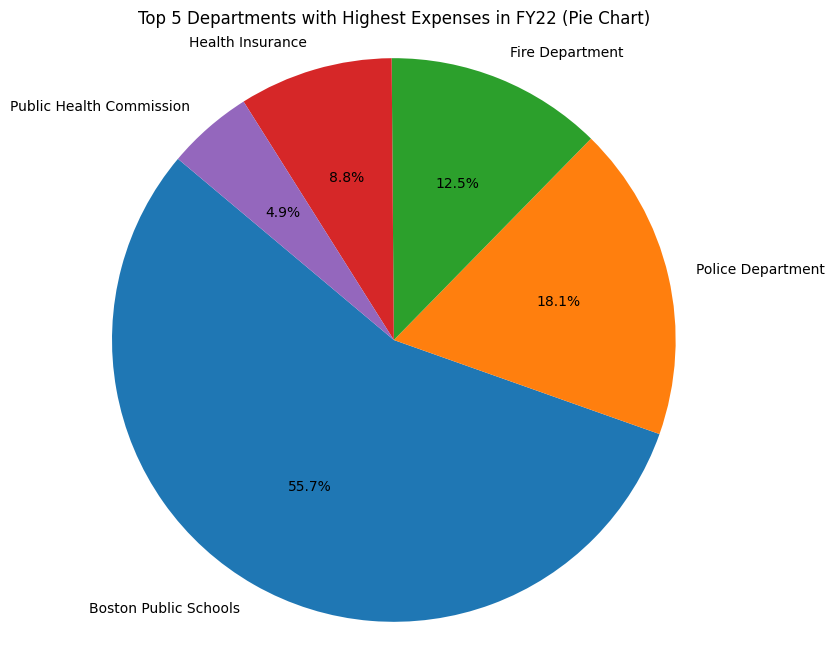

In [11]:
top_5_programs = sorted_programs.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_programs['FY22 Percentage'], labels=top_5_programs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Departments with Highest Expenses in FY22 (Pie Chart)')
plt.axis('equal')

plt.show()

Top 10 programs with the highest expenses in FY23:
                           FY23 Appropriation  Total Expenses  FY23 Percentage
Dept                                                                          
Boston Public Schools            1.377262e+09    1.377262e+09        43.543404
Police Department                3.959078e+08    3.959078e+08        12.516986
Fire Department                  2.769026e+08    2.769026e+08         8.754528
Health Insurance                 2.173104e+08    2.173104e+08         6.870466
Public Health Commission         1.179942e+08    1.179942e+08         3.730495
Public Works Department          1.059555e+08    1.059555e+08         3.349881
MBTA                             9.361319e+07    9.361319e+07         2.959666
Mayor's Office of Housing        4.464415e+07    4.464415e+07         1.411466
Library Department               4.395553e+07    4.395553e+07         1.389694
Transportation Department        4.209453e+07    4.209453e+07         1.330857


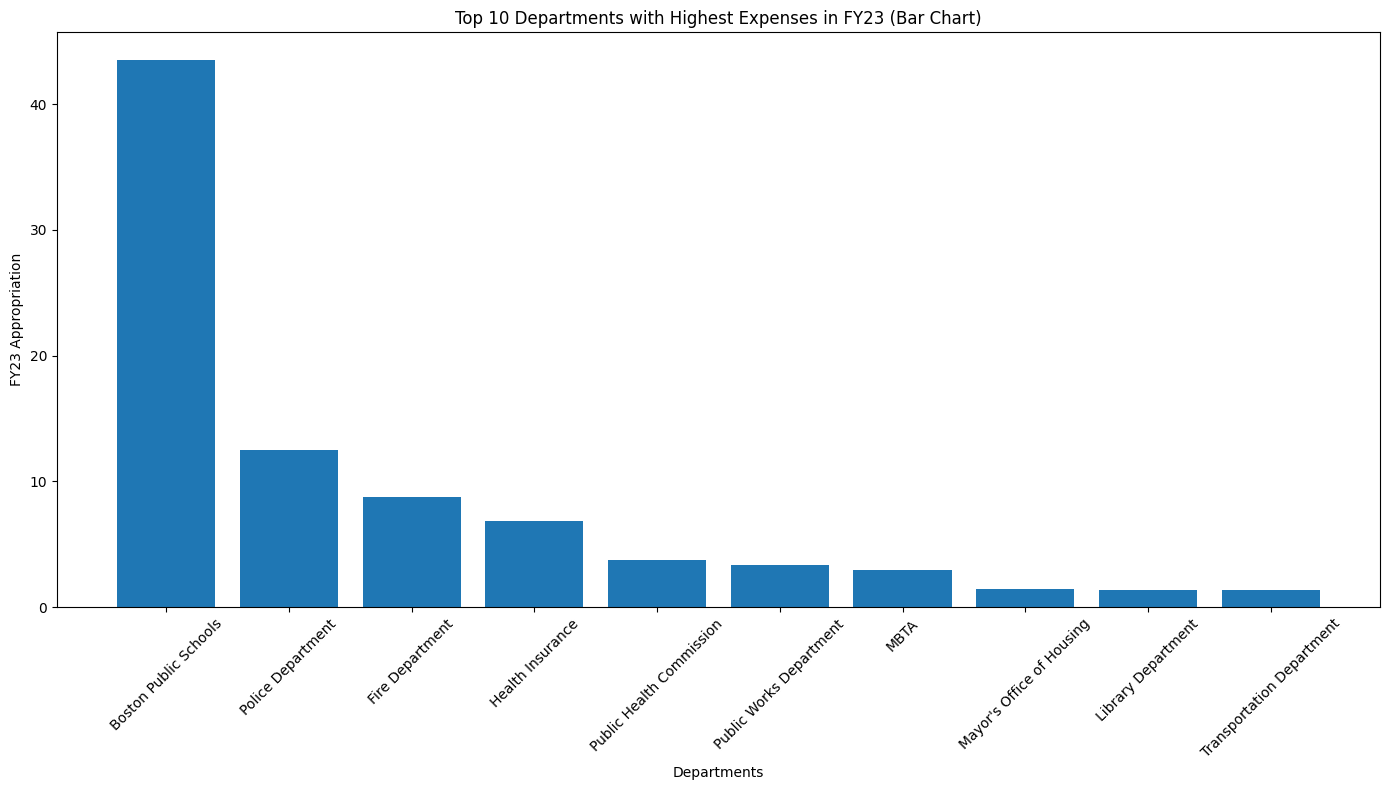

In [12]:
total_expenses_fy23 = fy23_expenses['FY23 Appropriation'].sum()
fy23_expenses['FY23 Percentage'] = (fy23_expenses['FY23 Appropriation'] / total_expenses_fy23) * 100

# Sort the programs by FY22 Actual Expense in descending order
sorted_programs = fy23_expenses.sort_values(by='FY23 Appropriation', ascending=False)

# Select the top 10 programs with the highest expenses in FY21
top_10_programs = sorted_programs.head(10)

print("Top 10 programs with the highest expenses in FY23:")
print(top_10_programs)

# Create the bar chart for FY21
plt.figure(figsize=(14, 8))
plt.bar(top_10_programs.index, top_10_programs['FY23 Percentage'])
plt.title('Top 10 Departments with Highest Expenses in FY23 (Bar Chart)')
plt.xlabel('Departments')
plt.ylabel('FY23 Appropriation')
plt.xticks(rotation=45)
plt.tight_layout()

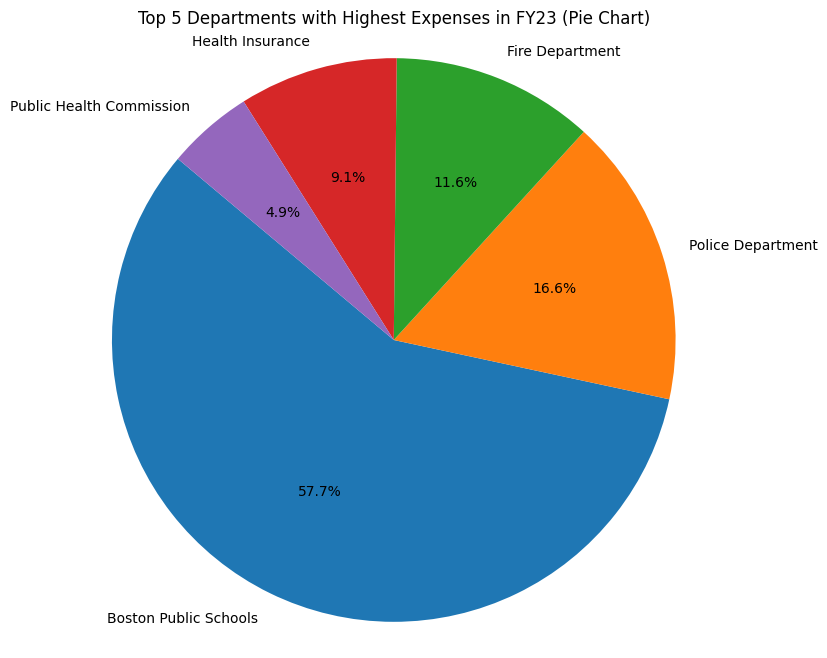

In [13]:
top_5_programs = sorted_programs.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_programs['FY23 Percentage'], labels=top_5_programs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Departments with Highest Expenses in FY23 (Pie Chart)')
plt.axis('equal')

plt.show()

Top 10 programs with the highest expenses in FY23:
                                        FY24 Adopted  Total Expenses  \
Dept                                                                   
Boston Public Schools                   1.445729e+09    1.445729e+09   
Police Department                       4.049732e+08    4.049732e+08   
Fire Department                         2.780671e+08    2.780671e+08   
Health Insurance                        2.223533e+08    2.223533e+08   
Public Health Commission                1.299073e+08    1.299073e+08   
Public Works Department                 1.162021e+08    1.162021e+08   
MBTA                                    9.528319e+07    9.528319e+07   
Reserve for Collective Bargaining City  7.621268e+07    7.621268e+07   
Mayor's Office of Housing               4.942307e+07    4.942307e+07   
Library Department                      4.837914e+07    4.837914e+07   

                                        FY24 Percentage  
Dept                      

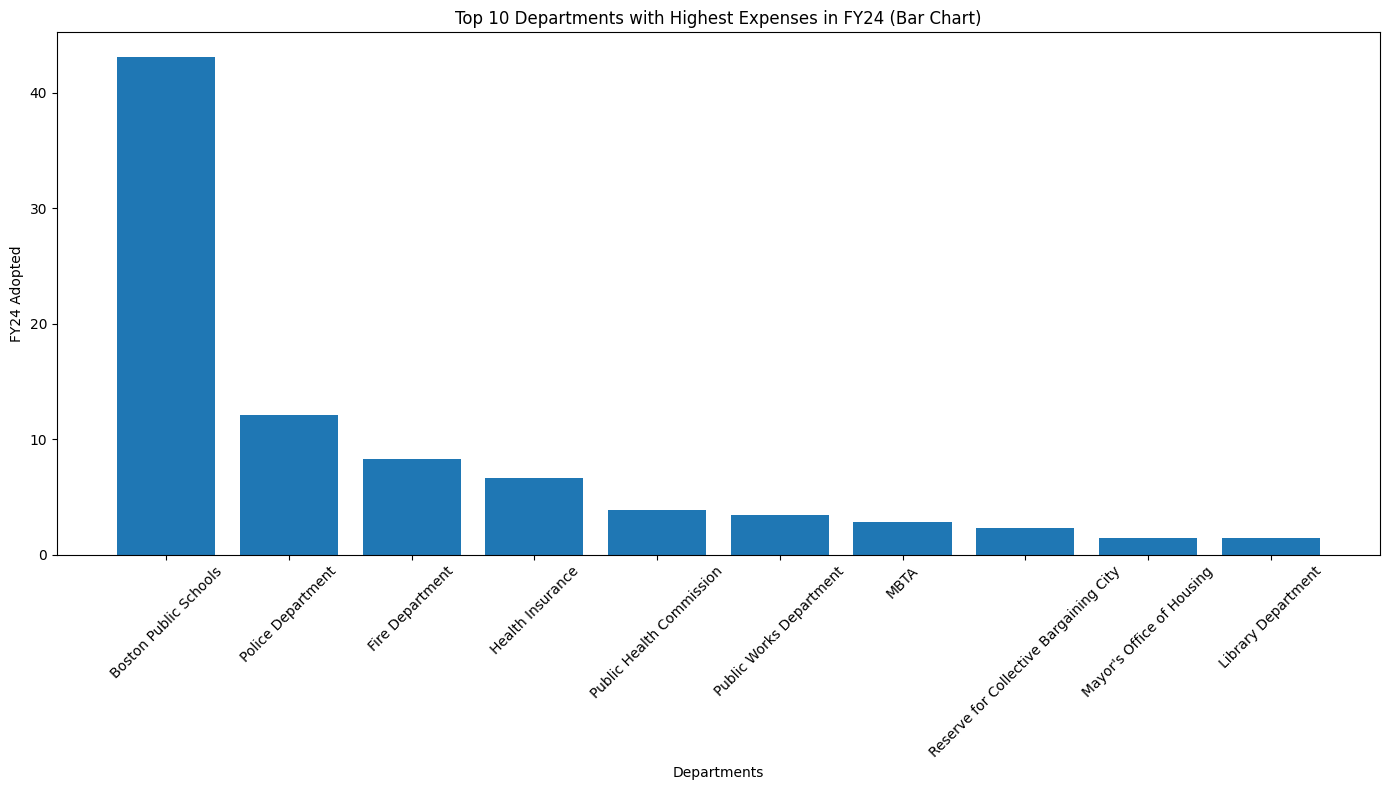

In [14]:
total_expenses_fy24 = fy24_expenses['FY24 Adopted'].sum()
fy24_expenses['FY24 Percentage'] = (fy24_expenses['FY24 Adopted'] / total_expenses_fy24) * 100

# Sort the programs by FY22 Actual Expense in descending order
sorted_programs = fy24_expenses.sort_values(by='FY24 Adopted', ascending=False)

# Select the top 10 programs with the highest expenses in FY21
top_10_programs = sorted_programs.head(10)

print("Top 10 programs with the highest expenses in FY23:")
print(top_10_programs)

# Create the bar chart for FY21
plt.figure(figsize=(14, 8))
plt.bar(top_10_programs.index, top_10_programs['FY24 Percentage'])
plt.title('Top 10 Departments with Highest Expenses in FY24 (Bar Chart)')
plt.xlabel('Departments')
plt.ylabel('FY24 Adopted')
plt.xticks(rotation=45)
plt.tight_layout()

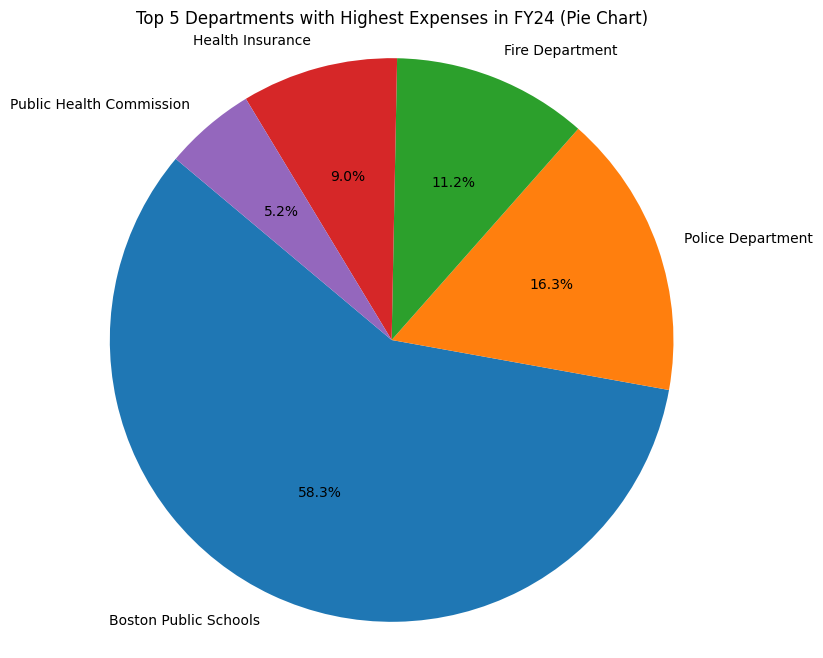

In [15]:
top_5_programs = sorted_programs.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_programs['FY24 Percentage'], labels=top_5_programs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Departments with Highest Expenses in FY24 (Pie Chart)')
plt.axis('equal')

plt.show()

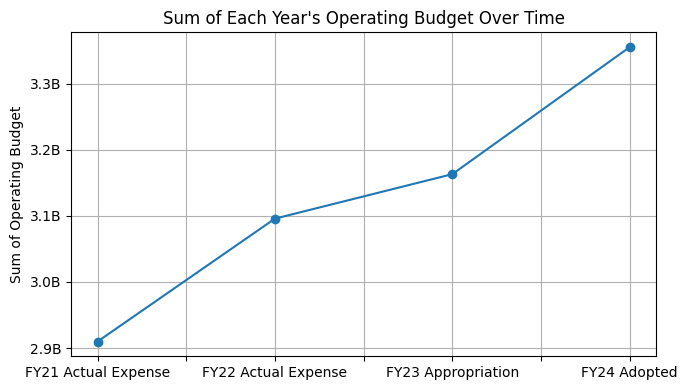

In [59]:
from matplotlib.ticker import FuncFormatter

sums = df[['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']].sum()

# Define a function to format y-axis values in millions
def millions_formatter(x, pos):
    return f'{x / 1e9:.1f}B'

# Plotting the data
plt.figure(figsize=(7, 4))
sums.plot(kind='line', marker='o')
plt.title("Sum of Each Year's Operating Budget Over Time")
plt.ylabel('Sum of Operating Budget')
plt.grid(True)

# Apply the millions_formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()



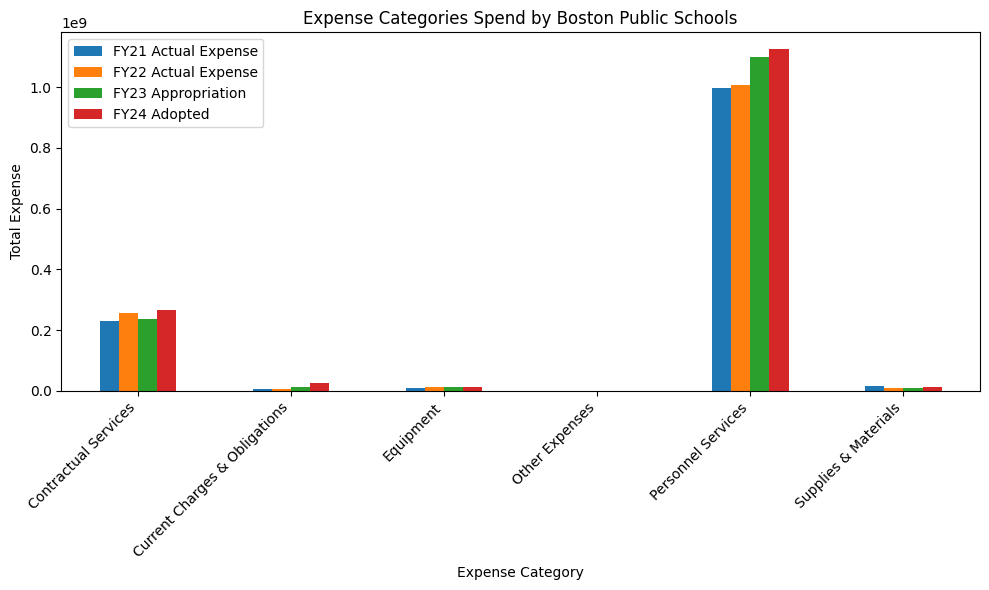

In [58]:
df_bps = df[df['Dept'] == 'Boston Public Schools']

# Drop rows with missing values in the 'FY21 Actual Expense' and 'FY22 Actual Expense' columns
df_bps = df_bps.dropna(subset=['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted'])

# Group by 'Expense Category' and sum the expenses for each category
df_expense_categories = df_bps.groupby('Expense Category')[['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']].sum()

# Plotting the data as a bar chart
df_expense_categories.plot(kind='bar', figsize=(10, 6))
plt.title('Expense Categories Spend by Boston Public Schools')
plt.xlabel('Expense Category')
plt.ylabel('Total Expense')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

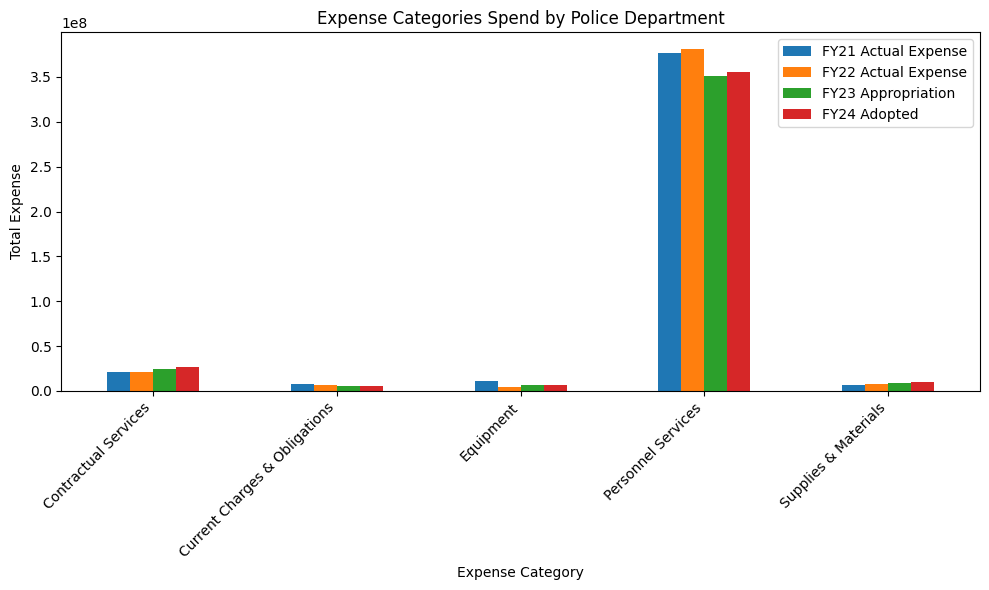

In [60]:
df_bps = df[df['Dept'] == 'Police Department']

# Drop rows with missing values in the 'FY21 Actual Expense' and 'FY22 Actual Expense' columns
df_bps = df_bps.dropna(subset=['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted'])

# Group by 'Expense Category' and sum the expenses for each category
df_expense_categories = df_bps.groupby('Expense Category')[['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']].sum()

# Plotting the data as a bar chart
df_expense_categories.plot(kind='bar', figsize=(10, 6))
plt.title('Expense Categories Spend by Police Department')
plt.xlabel('Expense Category')
plt.ylabel('Total Expense')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

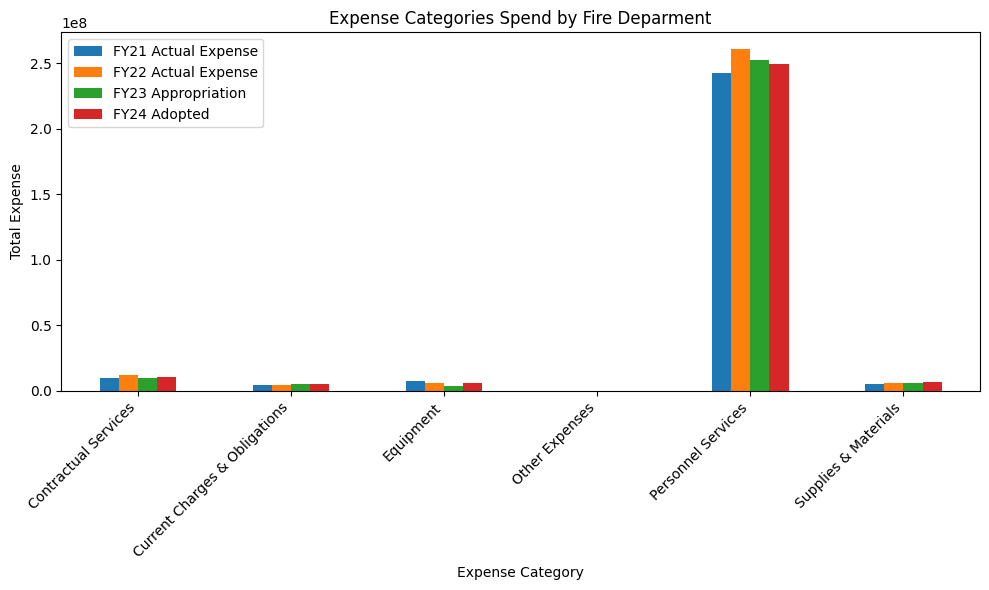

In [61]:
df_bps = df[df['Dept'] == 'Fire Department']

# Drop rows with missing values in the 'FY21 Actual Expense' and 'FY22 Actual Expense' columns
df_bps = df_bps.dropna(subset=['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted'])

# Group by 'Expense Category' and sum the expenses for each category
df_expense_categories = df_bps.groupby('Expense Category')[['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']].sum()

# Plotting the data as a bar chart
df_expense_categories.plot(kind='bar', figsize=(10, 6))
plt.title('Expense Categories Spend by Fire Deparment')
plt.xlabel('Expense Category')
plt.ylabel('Total Expense')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

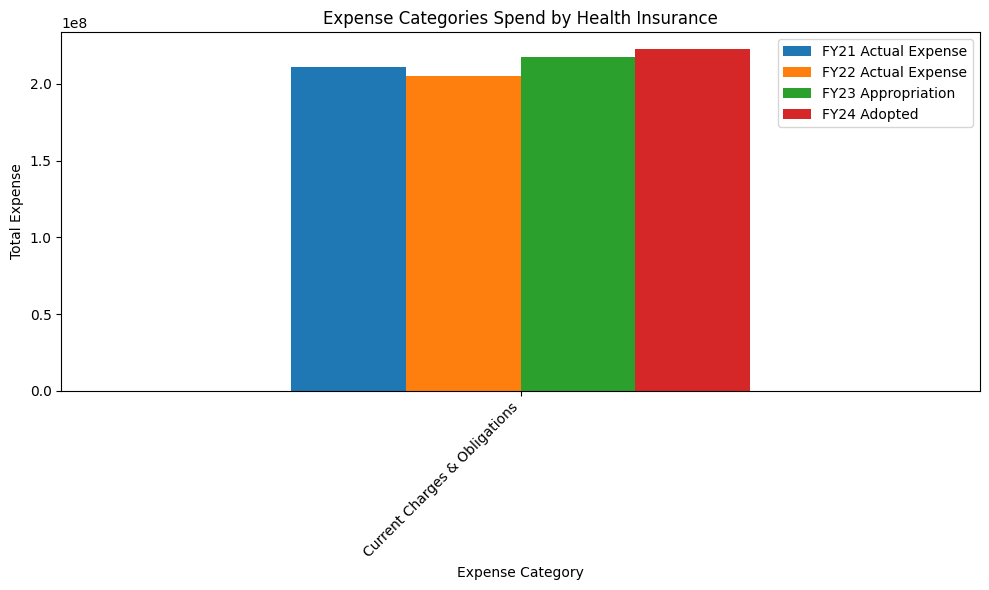

In [62]:
df_bps = df[df['Dept'] == 'Health Insurance']

# Drop rows with missing values in the 'FY21 Actual Expense' and 'FY22 Actual Expense' columns
df_bps = df_bps.dropna(subset=['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted'])

# Group by 'Expense Category' and sum the expenses for each category
df_expense_categories = df_bps.groupby('Expense Category')[['FY21 Actual Expense', 'FY22 Actual Expense', 'FY23 Appropriation', 'FY24 Adopted']].sum()

# Plotting the data as a bar chart
df_expense_categories.plot(kind='bar', figsize=(10, 6))
plt.title('Expense Categories Spend by Health Insurance')
plt.xlabel('Expense Category')
plt.ylabel('Total Expense')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()